# Computational Physics 281
\- Manav Kulshrestha

## Homework 6. 4/26/19.

### 1. Instability of RK2.
#### a)
I implemeted a function for RK2 and then plotted the numerical solutions from RK2 and odeint against t.

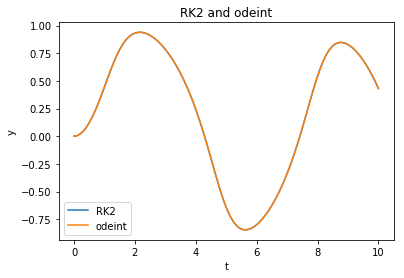

In [184]:
import numpy as np
from numpy import linspace,sin,abs,pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def plot(x,y,
         title=None,x_label=None,y_label=None,
         x_lim=None,y_lim=None,
         fig_size=None,plot_kwargs=None,sub_plot=None,legend=False,
         show=True):
    if fig_size:
        plt.figure(figsize=fig_size)
    if sub_plot:
        plt.subplot(sub_plot)
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if plot_kwargs:
        plt.plot(x,y,**plot_kwargs)
    else:
        plt.plot(x,y)
    if x_lim:
        plt.xlim(*x_lim)
    if y_lim:        
        plt.ylim(*y_lim)
    if legend:
        plt.legend()
    if show:
        plt.show()
        
def f(y,t):
    return -y**3 + sin(t)
        
N = 100
t = linspace(0,10,N)
y0 = 0

#RK2
def rk2(dydt,y0,t):
    y = np.empty(len(t))
    y[0] = y0
    h = t[1]-t[0]
    for i in range(1, len(t)):
        k1 = h*dydt(y[i-1], t[i-1])
        k2 = h*dydt(y[i-1] + k1/2, t[i-1] + h/2)
        y[i] = y[i-1] + k2
    return y

y_rk2 = rk2(f,y0,t)
        
#odeint
y_odeint = odeint(f,y0,t)

plot(t,y_rk2,plot_kwargs={'label':'RK2'},show=False)
plot(t,y_odeint,'RK2 and odeint','t','y',plot_kwargs={'label':'odeint'},legend=True)

#### b)
Here we can notice that RK2 is unstable for $\frac{dy}{dt} = -y^3 + sin(t)$ when $y_{0} = 10$

C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


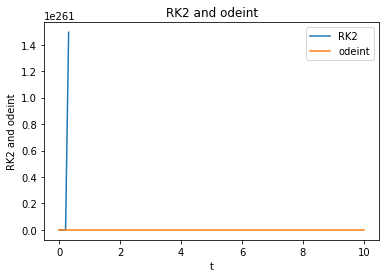

In [185]:
y0 = 10

#RK2
y_rk2 = rk2(f,y0,t)
        
#odeint
y_odeint = odeint(f,y0,t)

plot(t,y_rk2,plot_kwargs={'label':'RK2'},show=False)
plot(t,y_odeint,'RK2 and odeint','t','RK2 and odeint',plot_kwargs={'label':'odeint'},legend=True)

#### c)
Comparing RK2 with odeint for N = 100,200,300...1000, we notice that RK2 appears to start being stable around N = 600. This means that the problem encountered in part b) can be rectified by using enough points.

C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


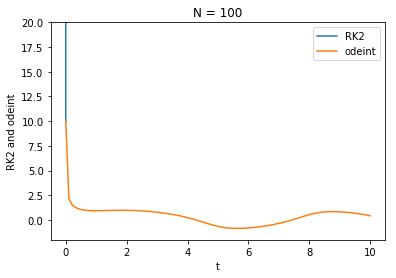

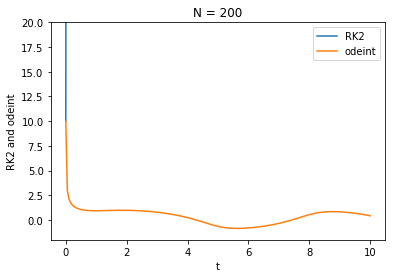

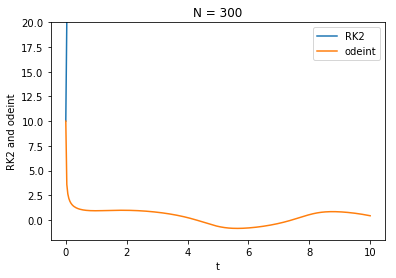

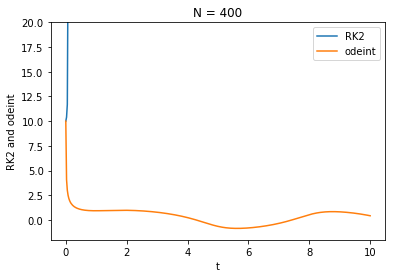

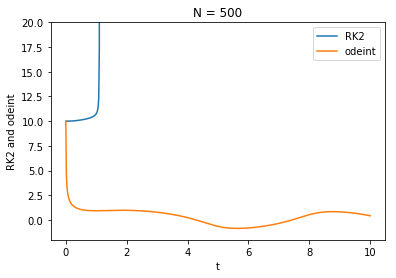

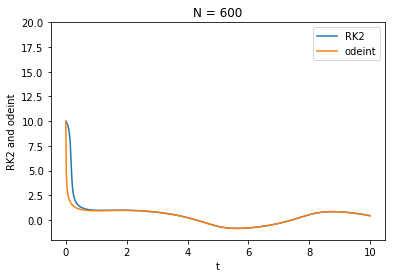

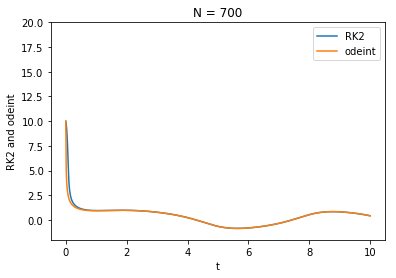

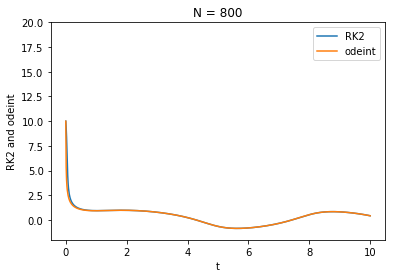

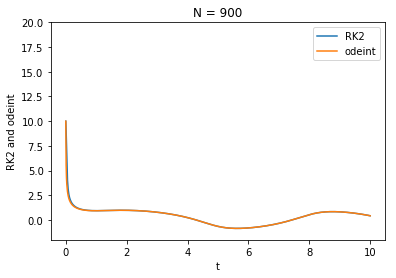

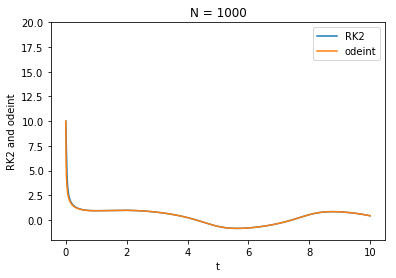

In [169]:
for N in range(100,1001,100):
    t = linspace(0,10,N)
    
    #RK2
    y_rk2 = rk2(f,y0,t)

    #odeint
    y_odeint = odeint(f,y0,t)

    plot(t,y_rk2,plot_kwargs={'label':'RK2'},y_lim=(-2,20),show=False)
    plot(t,y_odeint,f'N = {N}','t','RK2 and odeint',plot_kwargs={'label':'odeint'},y_lim=(-2,20),legend=True)

### 2. Lo-pass filter with limiter
#### a)
Here, I've implemented $\alpha$ as a function of $V_{out}$. After numerically solving for $V_{out}$ using RK2 and odeint, we find that they both agree and that $V_{out}$ is somewhat smaller than $V_{in}$. Since the amplitude is low enough (2), $|V_{out}|$ is always less than $V_{lim}$ so $\alpha$ is always 1.

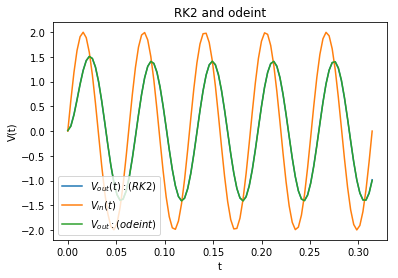

In [170]:
from numpy import pi,sin
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

A = 2 #V
V_lim = 2 #V
filt = 100 #rad/s
V0 = .01 #V
w = 100 #rad/s
n = 100 # number of points
t_max = 5*(2*pi/omega) 	# sec

def Vin(t):
    return  A*sin(w*t)

t = np.linspace(0, tmax, n)
V_in = Vin(t)
V_out_0 = 0.01   # Volts

def alpha(V_out):
    V_out_abs = abs(V_out)
    
    if V_out_abs > Vlim:
        return (V_out_abs - Vlim)/V_out_0
    else:
        return 1
    
def model(V_out, t):
    return 100*(Vin(t) - alpha(V_out)*V_out)

V_out_odeint = odeint(model, V_out_0, t)
V_out_rk2 = rk2(model, V_out_0, t)

plot(t,V_out_rk2,plot_kwargs={'label':'$V_{out}(t):(RK2)$'},show=False)
plot(t,V_in,plot_kwargs={'label':'$V_{in}(t)$'},show=False)
plot(t,V_out_odeint,'A = 2','t','V(t)',plot_kwargs={'label':'$V_{out}:(odeint)$'},legend=True)

plt.show()

#### b)
This time, since the amplitude is 4, $\alpha$ is not always 1 and the peaks and troughs of the sine wave are squared off. We can also see that at around N = 3500, RK2 stops being unstable.

C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Manav Kulshrestha\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


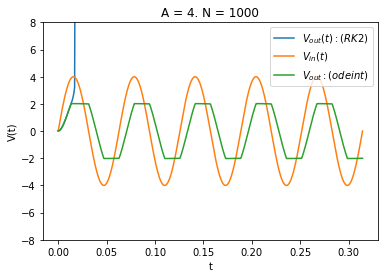

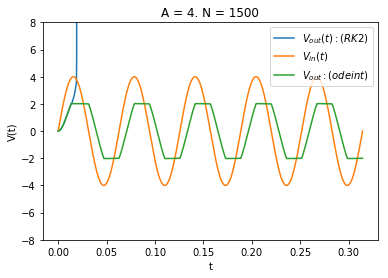

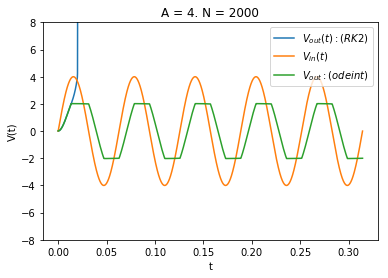

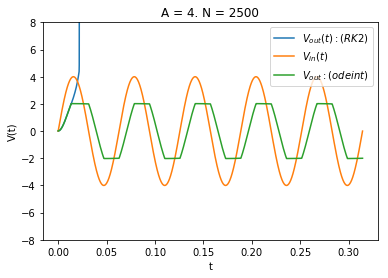

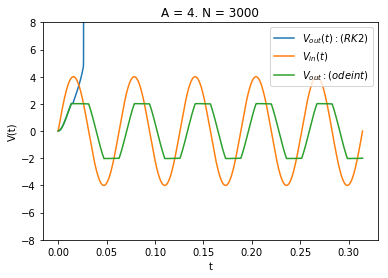

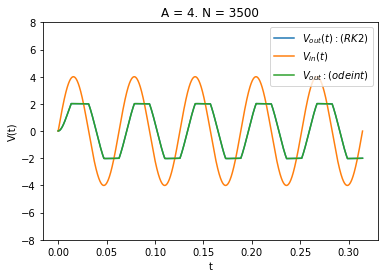

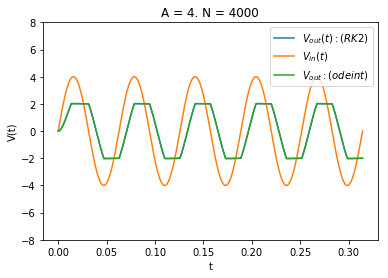

In [189]:
plt.ylim(-8,8)
A = 4

for n in range(1000,4001,500):
    t = linspace(0, t_max, n)
    V_in = Vin(t)

    V_out_odeint = odeint(model, V_out_0, t)
    V_out_rk2 = rk2(model, V_out_0, t)

    plot(t,V_out_rk2,plot_kwargs={'label':'$V_{out}(t):(RK2)$'},y_lim=(-8,8),show=False)
    plot(t,V_in,plot_kwargs={'label':'$V_{in}(t)$'},show=False)
    plot(t,V_out_odeint,f'A = 4. N = {n}','t','V(t)',plot_kwargs={'label':'$V_{out}:(odeint)$'},legend=True)

### 3. Projectile motion (a second-order ODE)
For this, I implemented a modified RK2 function to handle second order differential equations.

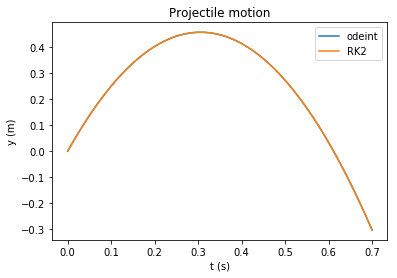

In [193]:
def rk22(dydtdvdt, y0v0, t):
    dydt,dvdt = dydtdvdt
    y0,v0 = y0v0
    
    len_t = len(t)
    y = np.empty(len_t)
    v = np.empty(len_t)
    
    y[0] = y0
    v[0] = v0
    
    h = t[1]-t[0]
    
    for i in range(1, len(t)):
        k1 = h*dydt(y[i-1], v[i-1], t[i-1])
        l1 = h*dvdt(y[i-1], v[i-1], t[i-1])
        k2 = h*dydt(y[i-1] + k1/2, v[i-1] + l1/2, t[i-1] + h/2)
        l2 = h*dvdt(y[i-1] + k1/2, v[i-1] + l1/2, t[i-1] + h/2)
        
        y[i] = y[i-1] + k2
        v[i] = v[i-1] + l2
        
    return y,v

g = 9.81 #m/s
 
def dydt(y,v,t):
    return v
 
def dvdt(y,v,t):
    return -g

def f(yv,t):
    y,v = yv
    dydt = v
    dvdt = -g

    return dydt,dvdt

y_0 = 0
dydt_0 = 3 #m/s
t_0 = 0

t = linspace(t_0,.7,1000)
y_odeint = odeint(f,(y_0,dydt_0),t)
y_rk2 = rk22((dydt,dvdt),(y_0,dydt_0),t)

plot(t,y_odeint[:,0],show=False,plot_kwargs={'label':'odeint'})
plot(t,y_rk2[0],'Projectile motion','t (s)','y (m)',plot_kwargs={'label':'RK2'},legend=True)

### 4. Bouncing ball

Trying different values for N:

N = $10^2$ - RK2 diverges to very large numbers.

N = $10^3$ - RK2 is inaccurate and higher bounces indicate violation of conservation of energy.

N = $10^4$ - inaccuracies in RK2 are neglegible.

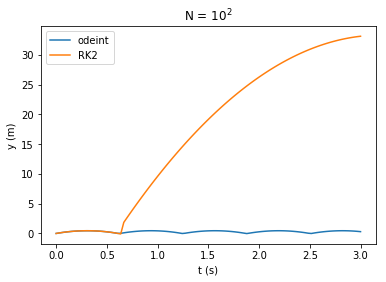

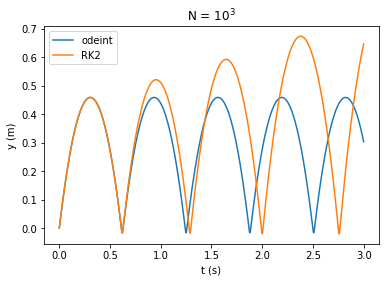

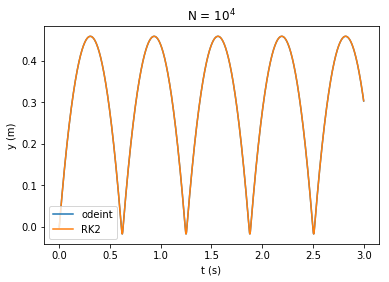

In [216]:
k =  1e4 #N/m
m = .3 #Kg

def Ff(y):
    if y < 0:
        return -k*y
    else:
        return 0

def dydt(y,v,t):
    return v
 
def dvdt(y,v,t):
    return -g + Ff(y)/m

def f(yv,t):
    y,v = yv
    dydt = v
    dvdt = -g + Ff(y)/m

    return dydt,dvdt

for ex in range(2,5):
    t = linspace(0,3,10**ex)

    y_odeint = odeint(f,(y_0,dydt_0),t)
    y_rk2 = rk22((dydt,dvdt),(y_0,dydt_0),t)

    plot(t,y_odeint[:,0],show=False,plot_kwargs={'label':'odeint'})
    plot(t,y_rk2[0],f'N = $10^{ex}$','t (s)','y (m)',plot_kwargs={'label':'RK2'},legend=True)

#### b)
Adding a viscous damping force reduces kinetic energ of the mass as it bounces resulting in lower and lower bounce peaks.

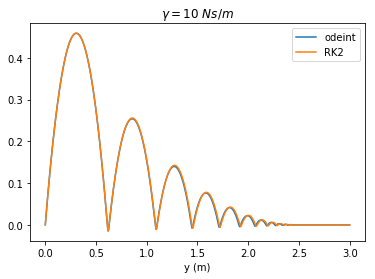

In [226]:
gamma = 10 #Ns/m

def Ff(y,v):
    if y < 0:
        return -k*y - gamma*v
    else:
        return 0
    
def dvdt(y,v,t):
    return -g + Ff(y,v)/m

def f(yv,t):
    y,v = yv
    dydt = v
    dvdt = -g + Ff(y,v)/m
    
    return dydt,dvdt
    
t = linspace(0,3,10**ex)

y_odeint = odeint(f,(y_0,dydt_0),t)
y_rk2 = rk22((dydt,dvdt),(y_0,dydt_0),t)

plot(t,y_odeint[:,0],show=False,plot_kwargs={'label':'odeint'})
plot(t,y_rk2[0],f'$\gamma = 10$ $Ns/m$','y (m)',plot_kwargs={'label':'RK2'},legend=True)